## Time Series preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- 1. Generate Synthetic Time Series Data ---
# Let's create a simple time series with a trend, seasonality, and some noise
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
data = np.linspace(0, 100, 365) + \
       10 * np.sin(np.linspace(0, 3 * np.pi, 365)) + \
       np.random.normal(0, 5, 365)

df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

print("Original Time Series Head:")
print(df.head())
print("\nOriginal Time Series Info:")
df.info()



Original Time Series Head:
               Value
Date                
2023-01-01  2.483571
2023-01-02 -0.157703
2023-01-03  4.305507
2023-01-04  9.215312
2023-01-05  0.961974

Original Time Series Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


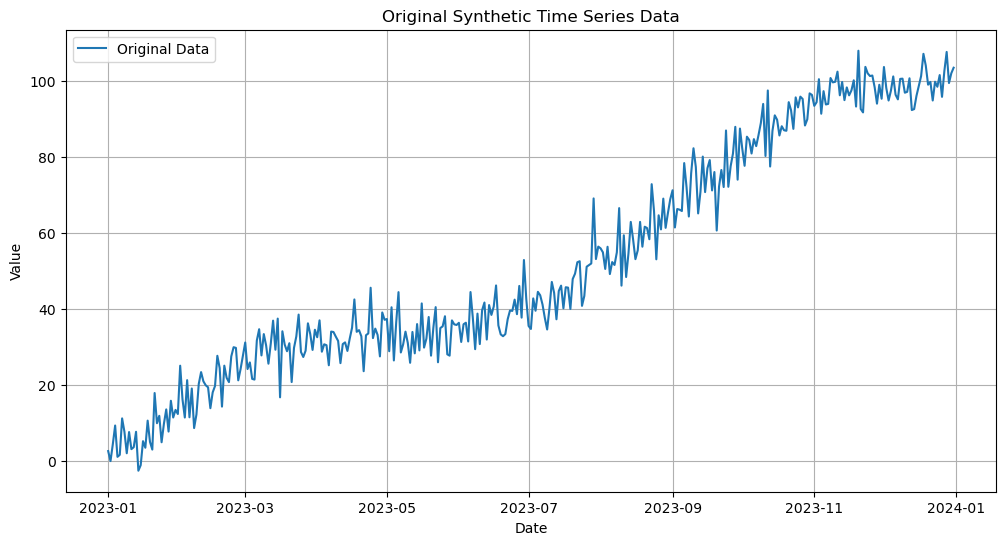

In [8]:
#Plot Original Data
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Value'],label='Original Data')
plt.title('Original Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# --- 2. Handling Missing Values ---
# Introduce some random missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df_missing = df.copy()
df_missing.loc[missing_indices, 'Value'] = np.nan
print("\nTime Series with Missing Values Head:")
print(df_missing.head(10))
print(f"Number of missing values: {df_missing['Value'].isnull().sum()}")


Time Series with Missing Values Head:
                Value
Date                 
2023-01-01   2.483571
2023-01-02  -0.157703
2023-01-03   4.305507
2023-01-04   9.215312
2023-01-05   0.961974
2023-01-06   1.493941
2023-01-07  11.091709
2023-01-08   7.562801
2023-01-09   1.907029
2023-01-10   7.494597
Number of missing values: 50


In [12]:
# a) Forward fill
df_ffill= df_missing.fillna(method='ffill')
print("\nTime Series after Forward Fill Head:")
print(df_ffill.head(10))


Time Series after Forward Fill Head:
                Value
Date                 
2023-01-01   2.483571
2023-01-02  -0.157703
2023-01-03   4.305507
2023-01-04   9.215312
2023-01-05   0.961974
2023-01-06   1.493941
2023-01-07  11.091709
2023-01-08   7.562801
2023-01-09   1.907029
2023-01-10   7.494597


C:\Users\punny\AppData\Local\Temp\ipykernel_26040\415969221.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill= df_missing.fillna(method='ffill')


In [14]:
# b) Linear Interpolation
df_interp = df_missing.interpolate(method = 'linear')
print("\nTime Series after Linear Interpolation Head:")
print(df_interp.head(10))


Time Series after Linear Interpolation Head:
                Value
Date                 
2023-01-01   2.483571
2023-01-02  -0.157703
2023-01-03   4.305507
2023-01-04   9.215312
2023-01-05   0.961974
2023-01-06   1.493941
2023-01-07  11.091709
2023-01-08   7.562801
2023-01-09   1.907029
2023-01-10   7.494597


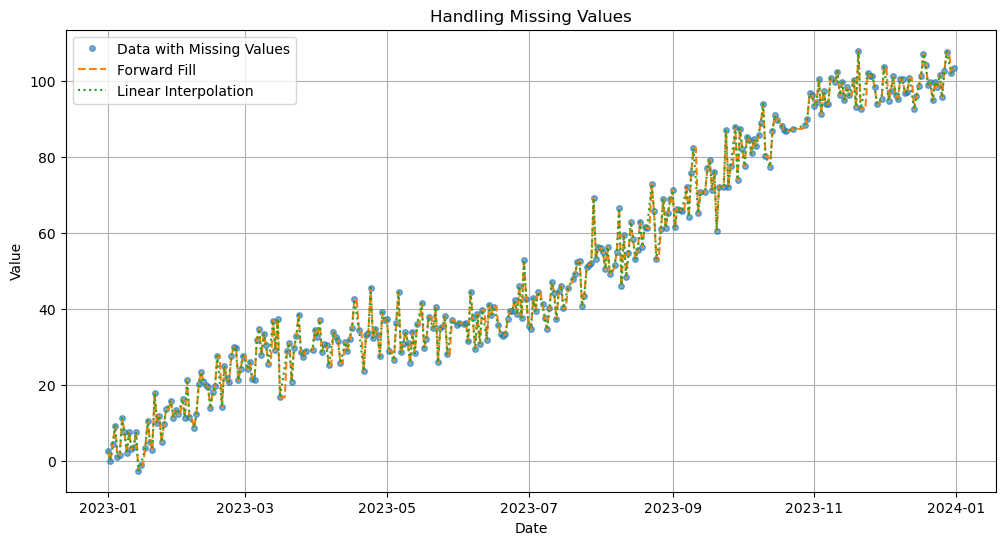

In [16]:
# Plotting missing value handling
plt.figure(figsize=(12, 6))
plt.plot(df_missing.index, df_missing['Value'], 'o', markersize=4, label='Data with Missing Values', alpha=0.6)
plt.plot(df_ffill.index, df_ffill['Value'], label='Forward Fill', linestyle='--')
plt.plot(df_interp.index, df_interp['Value'], label='Linear Interpolation', linestyle=':')
plt.title('Handling Missing Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# --- 3. Smoothing (Moving Average) ---
# Using the interpolated data for further processing
df_processed=df_interp.copy()
# Calculate a 7-day Simple Moving Average (SMA)
window_size = 7
df_processed['SMA'] = df_processed['Value'].rolling(window=window_size).mean()
print(f"\nTime Series with {window_size}-day SMA Head:")
print(df_processed.head(10))


Time Series with 7-day SMA Head:
                Value       SMA
Date                           
2023-01-01   2.483571       NaN
2023-01-02  -0.157703       NaN
2023-01-03   4.305507       NaN
2023-01-04   9.215312       NaN
2023-01-05   0.961974       NaN
2023-01-06   1.493941       NaN
2023-01-07  11.091709  4.199187
2023-01-08   7.562801  4.924791
2023-01-09   1.907029  5.219753
2023-01-10   7.494597  5.675337


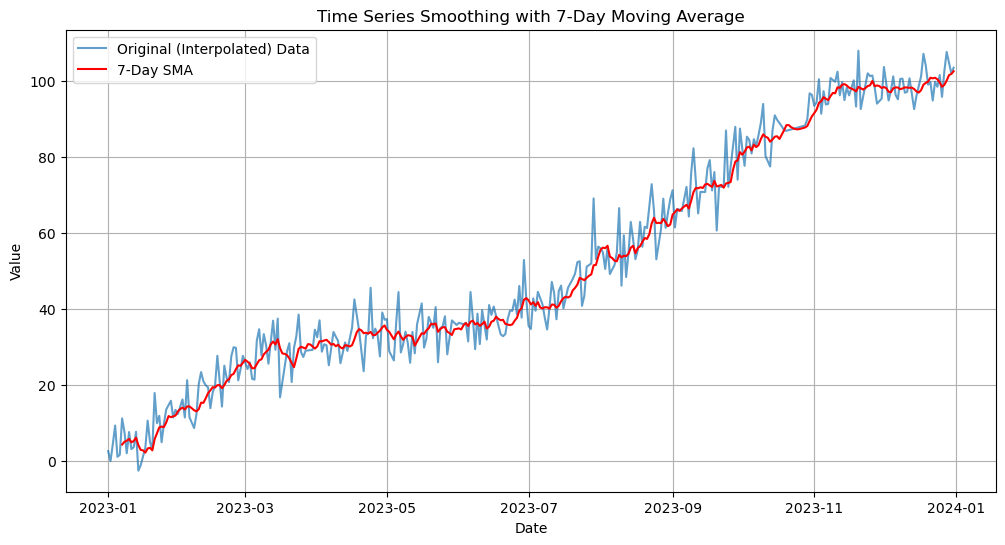

In [22]:
# Plotting smoothing
plt.figure(figsize=(12, 6))
plt.plot(df_processed.index, df_processed['Value'], label='Original (Interpolated) Data', alpha=0.7)
plt.plot(df_processed.index, df_processed['SMA'], label=f'{window_size}-Day SMA', color='red')
plt.title(f'Time Series Smoothing with {window_size}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# --- 4. Detrending (Differencing) ---
# Using the smoothed data (SMA) for detrending, or original if preferred
# Let's detrend the original interpolated data for clarity of effect
df_detrended = df_interp.copy()
# First-order differencing
df_detrended['Value_diff'] = df_detrended['Value'].diff()
print("\nTime Series after First-Order Differencing Head:")
print(df_detrended.head(10))


Time Series after First-Order Differencing Head:
                Value  Value_diff
Date                             
2023-01-01   2.483571         NaN
2023-01-02  -0.157703   -2.641273
2023-01-03   4.305507    4.463209
2023-01-04   9.215312    4.909805
2023-01-05   0.961974   -8.253338
2023-01-06   1.493941    0.531967
2023-01-07  11.091709    9.597768
2023-01-08   7.562801   -3.528908
2023-01-09   1.907029   -5.655772
2023-01-10   7.494597    5.587567


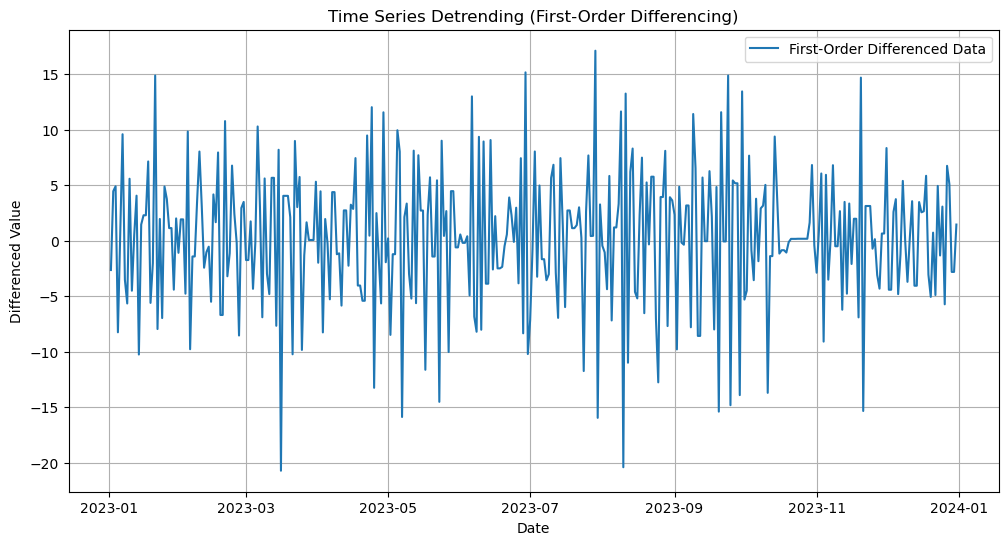

In [32]:
# Plotting detrending
plt.figure(figsize=(12, 6))
plt.plot(df_detrended.index, df_detrended['Value_diff'], label='First-Order Differenced Data')
plt.title('Time Series Detrending (First-Order Differencing)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.grid(True)
plt.show()

## Plot ACF and PACF

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

# Creating a simple ARIMA-like series for demonstration
np.random.seed(42)
data = np.random.randn(200).cumsum() + np.linspace(0, 20, 200) # A trended random walk
time_series = pd.Series(data)

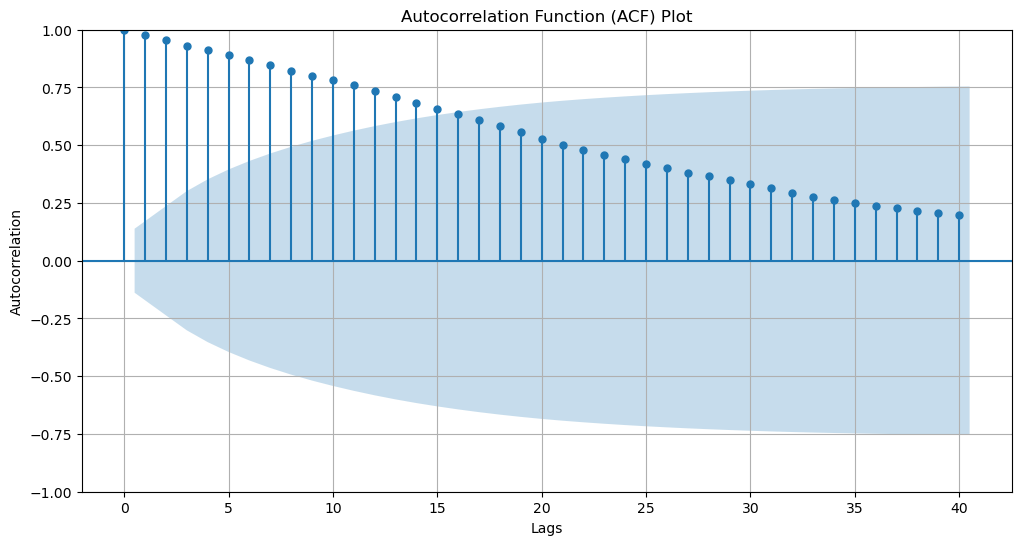

In [10]:
#plot the ACF
plt.figure(figsize=(12,6))
plot_acf(time_series,lags=40,ax=plt.gca())
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

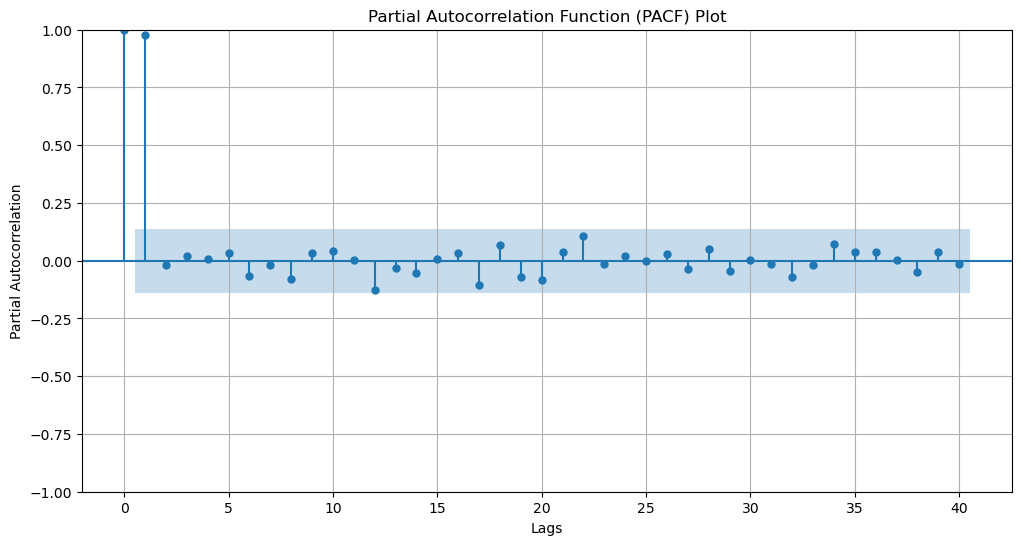

In [12]:
#plot pacf
plt.figure(figsize=(12,6))
plot_pacf(time_series,lags=40,ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

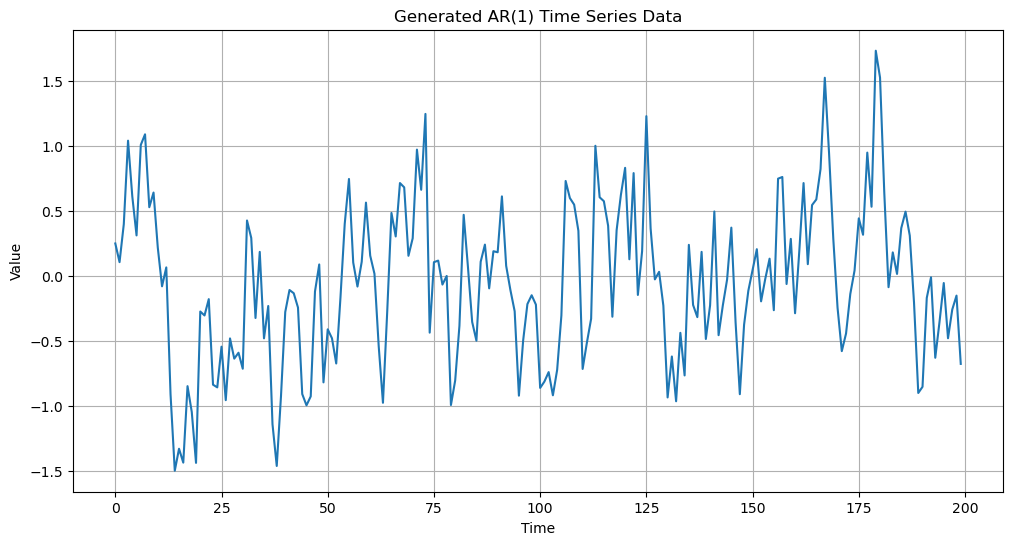

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample # For generating ARMA data
import statsmodels.api as sm

# Set a random seed for reproducibility
np.random.seed(42)

# --- Generate a sample time series ---
# Let's create an AR(1) process with some noise
# Y_t = 0.7 * Y_{t-1} + epsilon_t
ar_params = np.array([1,-0.7])
ma_params = np.array([1]) # No MA component for this example
# Generate 200 data points
y = arma_generate_sample(ar_params, ma_params, nsample=200, scale=0.5)
data = pd.Series(y)

# Plot the generated series
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title("Generated AR(1) Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

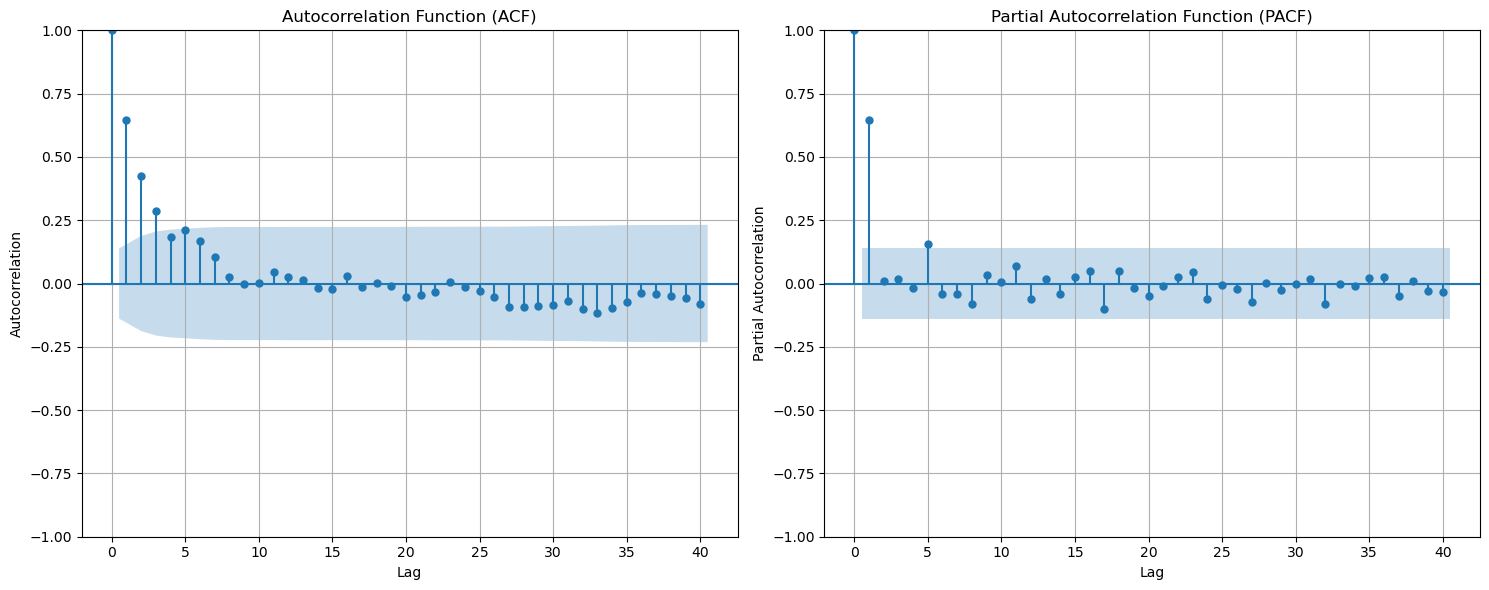

In [10]:
# --- Plotting ACF and PACF ---

# Set up the figure for both plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot ACF
plot_acf(data, ax=axes[0], lags=40, alpha=0.05)
axes[0].set_title("Autocorrelation Function (ACF)")
axes[0].set_xlabel("Lag")
axes[0].set_ylabel("Autocorrelation")
axes[0].grid(True)

# Plot PACF
plot_pacf(data, ax=axes[1], lags=40, alpha=0.05, method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF)")
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Daily Female Births Prediction with LSTM
**Given the number of births for the past N days, predict the number of births for the next day.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = [35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 43, 44, 54, 62, 57, 51, 60, 45, 39, 40, 52, 45, 54, 46, 55, 36, 45, 38, 48, 44, 44, 47, 48, 51, 55, 46, 52, 54, 53, 53, 61, 59, 63, 62, 63, 65, 68, 70, 69, 67, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
df = pd.Series(data)
print("First 5 rows of data:")
print(df.head())
print("\nData description:")
print(df.describe())

First 5 rows of data:
0    35
1    32
2    30
3    31
4    44
dtype: int64

Data description:
count    79.000000
mean     58.012658
std      16.911909
min      27.000000
25%      45.000000
50%      55.000000
75%      70.500000
max      90.000000
dtype: float64


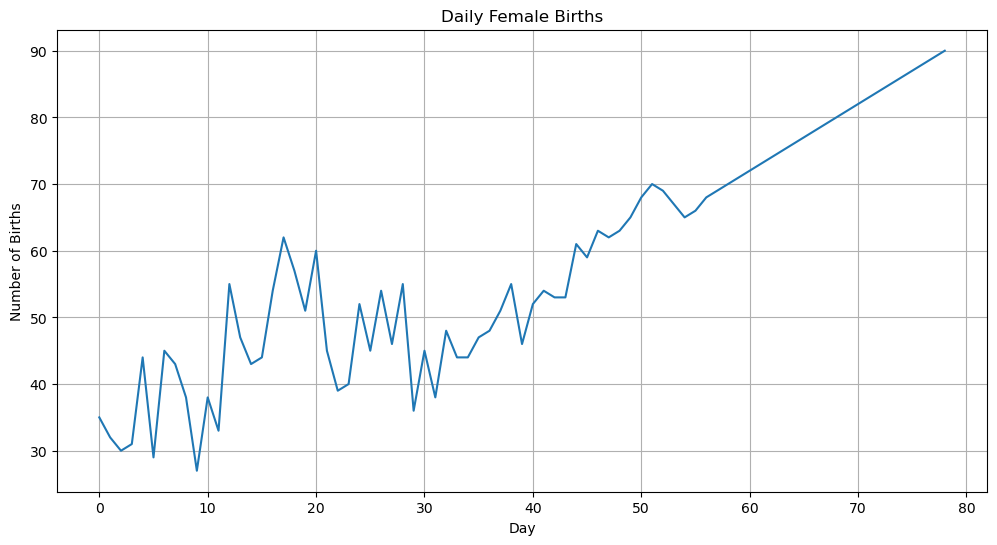

In [5]:
# Plot the data to see the trend
plt.figure(figsize=(12, 6))
plt.plot(df.values)
plt.title('Daily Female Births')
plt.xlabel('Day')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

In [21]:
#Convert pandas series to a numpy array
dataset = df.values.reshape(-1,1) # Reshape to (n_samples, n_features)

#Normalize the dataset
# LSTMs are sensitive to the scale of the input data, especially with sigmoid/tanh activation.
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

#Split into training and testing sets
train_size = int(len(dataset)*0.67)#67% for training
test_size = len(dataset)-train_size
train , test = dataset[0:train_size:] , dataset[train_size:len(dataset),:]
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")
print(f"Shape of 'dataset' before create_dataset: {dataset.shape}")

Training set size: 52
Testing set size: 27
Shape of 'dataset' before create_dataset: (79, 1)


In [31]:
import numpy as np # Ensure numpy is imported

# Function to create input-output sequences for LSTM
# X = [t-N, t-N+1, ..., t-1] (N past observations)
# y = [t] (the next observation)
def create_dataset(dataset_array, time_steps=1):
    X, Y = [], []
    # Ensure the input dataset is 1D for consistent slicing
    dataset_1d = dataset_array.flatten()

    # The loop should go from the beginning of the dataset
    # up to the point where we can no longer form a full sequence + target
    if len(dataset_1d) <= time_steps:
        print(f"Warning: Not enough data ({len(dataset_1d)} items) for time_steps={time_steps}. Need at least {time_steps + 1} items to create sequences.")
        return np.array([]), np.array([])

    for i in range(len(dataset_1d) - time_steps):
        # X will be the sequence of 'time_steps' values
        X.append(dataset_1d[i:(i + time_steps)])
        # Y will be the value immediately after the sequence
        Y.append(dataset_1d[i + time_steps])
    return np.array(X), np.array(Y)

# Assume 'train' and 'test' are your (N, 1) NumPy arrays after scaling and splitting

# Choose the timesteps period (number of previous time steps to consider)
time_steps = 10

# Call the function with flattened train and test data
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

print(f"\nShape of X_train AFTER create_dataset: {X_train.shape}")
print(f"Shape of y_train AFTER create_dataset: {y_train.shape}")
print(f"Shape of X_test AFTER create_dataset: {X_test.shape}")
print(f"Shape of y_test AFTER create_dataset: {y_test.shape}")




Shape of X_train AFTER create_dataset: (42, 10)
Shape of y_train AFTER create_dataset: (42,)
Shape of X_test AFTER create_dataset: (17, 10)
Shape of y_test AFTER create_dataset: (17,)


In [34]:
#Create LSTM model 
model = Sequential()

# Add an LSTM layer
# units: The number of LSTM units (neurons) in the layer. More units mean more capacity.
# input_shape: Specifies the shape of the input data, matching our (timesteps, features)
model.add(LSTM(units=50,input_shape=(time_steps,1)))

# Add a Dense (output) layer
# units=1 because we are predicting a single numerical value (number of births)
model.add(Dense(units=1))

# Compile the model
# optimizer: 'adam' is a good general-purpose optimizer.
# loss: 'mean_squared_error' (mse) is standard for regression problems like time series prediction.
model.compile(optimizer='adam',loss='mean_squared_error')

#Print the model summary
model.summary()

C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


Training the LSTM model...
Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0492
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119   
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077


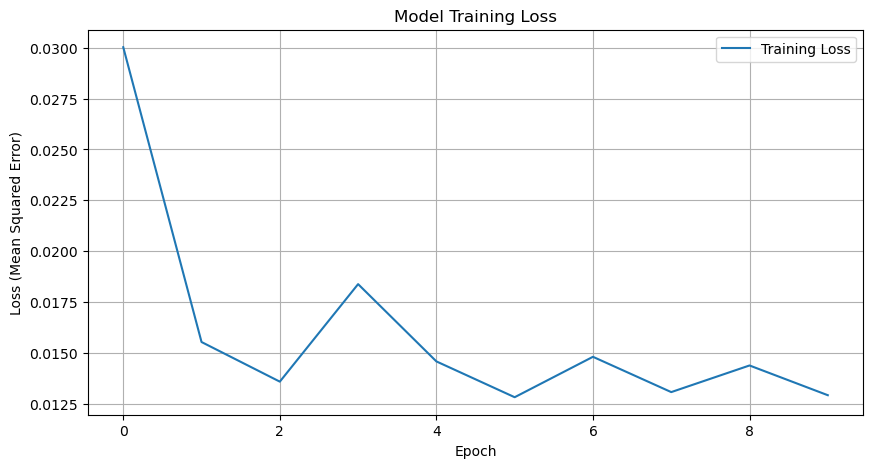

In [36]:
# Train the model
# epochs: How many times the model will go through the entire training dataset.
# batch_size: How many samples to process before updating the model's weights.
# verbose: 1 shows a progress bar during training.
print("\nTraining the LSTM model...")
history = model.fit(X_train,y_train,epochs=10,batch_size=1,verbose=1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Make predictions on the training and test sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
# Remember, we normalized the data, so we need to convert predictions back
train_predict = scaler.inverse_transform(train_predict)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)) # Reshape for inverse_transform

test_predict = scaler.inverse_transform(test_predict)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)) # Reshape for inverse_transform

# Calculate Root Mean Squared Error (RMSE) - a common metric for regression
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predict))

print(f"\nTrain RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Train RMSE: 7.45
Test RMSE: 0.54
